In [76]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [5]:
odom_pos = pd.read_json('../tmp_datas/odom_pos.json')
real_pos = pd.read_json('../tmp_datas/real_pos.json')

In [14]:
print(odom_pos.shape)
print(real_pos.shape)

(14057, 3)
(117228, 3)


In [15]:
odom_pos.head()

,time,x,y
0,156501000000,0.000045,1.870320e-09
1,156501000000,0.000045,1.870320e-09
2,156521000000,0.000045,1.871564e-09
3,156521000000,0.000045,1.871564e-09
4,156541000000,0.000045,1.872945e-09


In [16]:
odom_pos.tail()

,time,x,y
14052,273621000000,6.235864,4.609608
14053,273621000000,6.235864,4.609608
14054,273641000000,6.235864,4.609608
14055,273641000000,6.235864,4.609608
14056,273648000000,6.235864,4.609608


In [17]:
real_pos.head()

,time,x,y
0,156439000000,4.999894,2.299489
1,156439000000,4.999894,2.299489
2,156439000000,4.999894,2.299489
3,156439000000,4.999894,2.299489
4,156439000000,4.999894,2.299489


In [19]:
real_pos.tail()

,time,x,y
117223,273656000000,-1.175402,-2.445037
117224,273657000000,-1.175405,-2.445035
117225,273658000000,-1.175409,-2.445033
117226,273659000000,-1.175412,-2.445031
117227,273660000000,-1.175415,-2.445029


In [63]:
threshold = 3000000

tmp_list = []
for idx, row in odom_pos.iterrows():
    min_t = row['time'] - threshold
    max_t = row['time'] + threshold
#     print(real_pos[])
    df = real_pos[(real_pos['time']>min_t) & (real_pos['time']<max_t)].copy()
    real_xy = df[["x", "y"]].mean()
    tmp_list.append({
        "time": row['time'],
        "odom_x": row['x'],
        "odom_y": row['y'],
        "real_x": 5 - real_xy.x,
        "real_y": 2.3 - real_xy.y,
    })
df_odom_And_real = pd.DataFrame(tmp_list)
df_odom_And_real

,odom_x,odom_y,real_x,real_y,time
0,0.000045,1.870320e-09,0.000106,0.000512,1.565010e+11
1,0.000045,1.870320e-09,0.000106,0.000512,1.565010e+11
2,0.000045,1.871564e-09,0.000106,0.000512,1.565210e+11
3,0.000045,1.871564e-09,0.000106,0.000512,1.565210e+11
4,0.000045,1.872945e-09,0.000106,0.000512,1.565410e+11
5,0.000045,1.872945e-09,0.000106,0.000512,1.565410e+11
6,0.000045,1.872945e-09,0.000106,0.000512,1.565480e+11
7,0.000045,1.874190e-09,0.000106,0.000512,1.565610e+11
8,0.000045,1.874190e-09,0.000106,0.000512,1.565610e+11
9,0.000045,1.875572e-09,0.000106,0.000512,1.565810e+11


In [75]:
df_odom_And_real = df_odom_And_real[df_odom_And_real['odom_x']>0.1].copy()
df_odom_And_real

,odom_x,odom_y,real_x,real_y,time
1404,0.104320,0.088114,0.141925,0.064962,1.682010e+11
1405,0.104320,0.088114,0.141925,0.064962,1.682010e+11
1406,0.108950,0.089941,0.146526,0.066859,1.682210e+11
1407,0.108950,0.089941,0.146526,0.066859,1.682210e+11
1408,0.113455,0.091720,0.151010,0.068708,1.682410e+11
1409,0.113455,0.091720,0.151010,0.068708,1.682410e+11
1410,0.113455,0.091720,0.152542,0.069341,1.682480e+11
1411,0.117810,0.093443,0.155338,0.070497,1.682610e+11
1412,0.117810,0.093443,0.155338,0.070497,1.682610e+11
1413,0.122015,0.095111,0.159517,0.072229,1.682810e+11


In [74]:
x_mean_delta = (df_odom_And_real['odom_x']-df_odom_And_real['real_x']).abs().mean()
y_mean_delta = (df_odom_And_real['odom_y']-df_odom_And_real['real_y']).abs().mean()

error = math.sqrt(x_mean_delta**2 + y_mean_delta**2)
print(error)

0.196349792323493


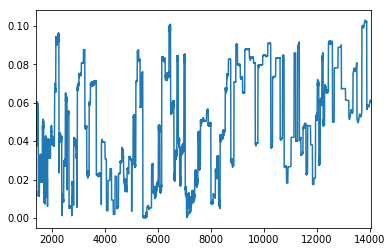

In [78]:
df = (df_odom_And_real['odom_x']-df_odom_And_real['real_x']).abs()
df.plot()